# 导入数据

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_df=pd.read_csv('比赛训练集.csv',encoding='gbk')
test_df=pd.read_csv('b榜新数据集.csv')


In [5]:
result = pd.DataFrame(np.arange(1,4001))
result['label'] = 0
result.rename(columns={0:"uuid"}).to_csv('提交示例.csv')

In [6]:
#result = pd.read_csv('提交示例.csv')
#result=result.append(pd.DataFrame(np.arange(1001,4001)),ignore_index = True)
#result = result.drop([0],axis=1)
#result['uuid'] = pd.DataFrame(np.arange(1,4001))
#result.to_csv('提交示例.csv',index=False)

# 探索性数据分析

In [7]:
print('训练集的数据大小：',train_df.shape)
print('测试集的数据大小：',test_df.shape)
print('-'*30)
print('训练集的数据类型：')
print(train_df.dtypes)
print('-'*30)
print(test_df.dtypes)

训练集的数据大小： (5070, 10)
测试集的数据大小： (4000, 9)
------------------------------
训练集的数据类型：
编号            int64
性别            int64
出生年份          int64
体重指数        float64
糖尿病家族史       object
舒张压         float64
口服耐糖量测试     float64
胰岛素释放实验     float64
肱三头肌皮褶厚度    float64
患有糖尿病标识       int64
dtype: object
------------------------------
编号            int64
性别            int64
出生年份          int64
体重指数        float64
糖尿病家族史       object
舒张压           int64
口服耐糖量测试     float64
胰岛素释放实验     float64
肱三头肌皮褶厚度    float64
dtype: object


In [8]:

#----------------查数据的缺失值----------------
print(train_df.isnull().sum())
print('-'*30)
print(test_df.isnull().sum())
#可以看到 训练集和测试集中都是舒张压有缺失值


编号            0
性别            0
出生年份          0
体重指数          0
糖尿病家族史        0
舒张压         247
口服耐糖量测试       0
胰岛素释放实验       0
肱三头肌皮褶厚度      0
患有糖尿病标识       0
dtype: int64
------------------------------
编号          0
性别          0
出生年份        0
体重指数        0
糖尿病家族史      0
舒张压         0
口服耐糖量测试     0
胰岛素释放实验     0
肱三头肌皮褶厚度    0
dtype: int64


In [9]:

#----------------查数据相关性----------------
print('-'*30)
print('查看训练集中数据的相关性')
print(train_df.corr())
print(test_df.corr())


------------------------------
查看训练集中数据的相关性
                编号        性别      出生年份      体重指数       舒张压   口服耐糖量测试  \
编号        1.000000  0.006603 -0.006693  0.000028  0.003495 -0.005840   
性别        0.006603  1.000000 -0.119563  0.075186  0.078870  0.011463   
出生年份     -0.006693 -0.119563  1.000000 -0.074603 -0.154631  0.002085   
体重指数      0.000028  0.075186 -0.074603  1.000000  0.159903 -0.001796   
舒张压       0.003495  0.078870 -0.154631  0.159903  1.000000 -0.020317   
口服耐糖量测试  -0.005840  0.011463  0.002085 -0.001796 -0.020317  1.000000   
胰岛素释放实验   0.020441 -0.053597  0.058585 -0.034507 -0.206663  0.093715   
肱三头肌皮褶厚度  0.030330  0.014037 -0.013111  0.026321  0.076147 -0.006483   
患有糖尿病标识   0.027435  0.031480 -0.068225  0.377919  0.157421  0.178133   

           胰岛素释放实验  肱三头肌皮褶厚度   患有糖尿病标识  
编号        0.020441  0.030330  0.027435  
性别       -0.053597  0.014037  0.031480  
出生年份      0.058585 -0.013111 -0.068225  
体重指数     -0.034507  0.026321  0.377919  
舒张压      -0.206663  0.076147  

<AxesSubplot:>

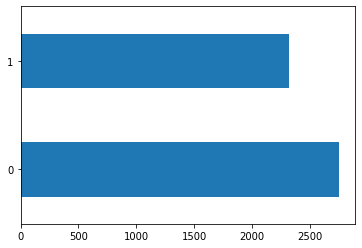

In [10]:
#----------------数据的可视化统计----------------
import matplotlib.pyplot as plt
import seaborn as sns

train_df['性别'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='患有糖尿病标识', ylabel='count'>

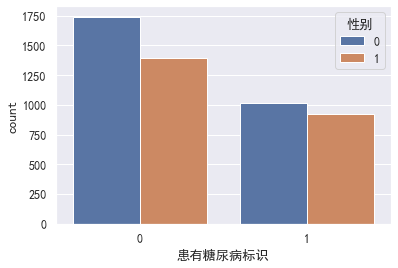

In [11]:
sns.set(font='SimHei',font_scale=1.1)  # 解决Seaborn中文显示问题并调整字体大小
sns.countplot(x='患有糖尿病标识', hue='性别', data=train_df)

<AxesSubplot:xlabel='患有糖尿病标识', ylabel='出生年份'>

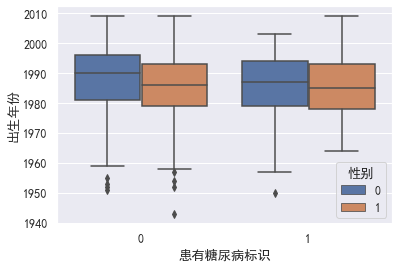

In [12]:
sns.boxplot(y='出生年份', x='患有糖尿病标识', hue='性别', data=train_df)

<Figure size 2000x1000 with 0 Axes>

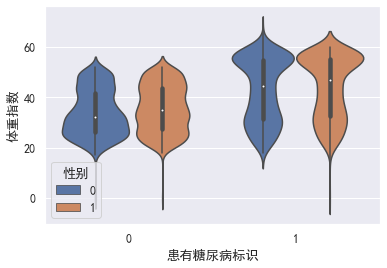

<Figure size 2000x1000 with 0 Axes>

In [13]:
sns.violinplot(y='体重指数', x='患有糖尿病标识', hue='性别', data=train_df)
plt.figure(figsize = [20,10],dpi=100)

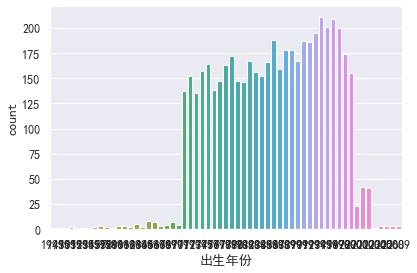

In [14]:
sns.countplot(x='出生年份',data=train_df)
plt.tight_layout()

In [15]:
train_df

,编号,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
0,1,0,1996,30.1,无记录,106.0,3.818,7.89,0.0,0
1,2,0,1988,27.5,无记录,84.0,-1.000,0.00,14.7,0
2,3,1,1988,36.5,无记录,85.0,7.131,0.00,40.1,1
3,4,1,1992,29.5,无记录,91.0,7.041,0.00,0.0,0
4,5,0,1998,42.0,叔叔或者姑姑有一方患有糖尿病,NaN,7.134,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
5065,5066,1,1992,36.4,父母有一方患有糖尿病,95.0,3.102,0.00,0.0,0
5066,5067,1,1991,37.1,叔叔或姑姑有一方患有糖尿病,94.0,6.207,6.77,0.0,0
5067,5068,0,1975,25.4,无记录,90.0,7.343,0.00,0.0,0
5068,5069,0,1972,28.5,父母有一方患有糖尿病,101.0,6.268,8.99,0.0,0


# 特征工程

In [ ]:
#这里将文本数据转成数字数据
dict_糖尿病家族史 = {
    '无记录': 0,
    '叔叔或姑姑有一方患有糖尿病': 1,
    '叔叔或者姑姑有一方患有糖尿病': 1,
    '父母有一方患有糖尿病': 2
}

train_df['糖尿病家族史'] = train_df['糖尿病家族史'].map(dict_糖尿病家族史)
test_df['糖尿病家族史'] = test_df['糖尿病家族史'].map(dict_糖尿病家族史)


In [ ]:

#考虑到舒张压是一个较为重要的生理特征，并不能适用于填充平均值，这里采用填充为0的方法
train_df['舒张压'].fillna(0, inplace=True)
test_df['舒张压'].fillna(0, inplace=True)


In [ ]:

#将数据中的出生年份换算成年龄
train_df['出生年份'] = 2022 - train_df['出生年份']
test_df['出生年份'] = 2022 - test_df['出生年份']

#将年龄进行一个分类
"""
>50
<=18
19-30
31-50
"""
def resetAge(input):
    if input<=18:
        return 0
    elif 19<=input<=30:
        return 1
    elif 31<=input<=50:
        return 2
    elif input>=51:
        return 3

train_df['rAge']=train_df['出生年份'].apply(resetAge)
test_df['rAge']=test_df['出生年份'].apply(resetAge)


In [ ]:

#将体重指数进行一个分类
"""
人体的成人体重指数正常值是在18.5-24之间
低于18.5是体重指数过轻
在24-27之间是体重超重
27以上考虑是肥胖
高于32了就是非常的肥胖。
"""
def BMI(a):
    if a<18.5:
        return 0
    elif 18.5<=a<=24:
        return 1
    elif 24<a<=27:
        return 2
    elif 27<a<=32:
        return 3
    else:
        return 4

train_df['BMI']=train_df['体重指数'].apply(BMI)
test_df['BMI']=test_df['体重指数'].apply(BMI)


In [ ]:
#将舒张压进行一个分组
"""
舒张压范围为60-90
"""
def DBP(a):
    if a==0:#这里为数据缺失的情况
        return 0
    elif 0<a<60:
        return 1
    elif 60<=a<=90:
        return 2
    else:
        return 3
train_df['DBP']=train_df['舒张压'].apply(DBP)
test_df['DBP']=test_df['舒张压'].apply(DBP)


In [ ]:

#删除编号
train_df=train_df.drop(['编号'],axis=1)
test_df=test_df.drop(['编号'],axis=1)
train_df

In [17]:
train_df[train_df["舒张压"]==0]

,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,rAge,BMI,DBP
4,0,24,42.0,1,0.0,7.134,0.00,0.00,1,1,4,0
5,1,32,28.0,0,0.0,6.077,0.00,0.00,0,2,3,0
17,1,23,40.5,2,0.0,5.812,6.22,0.00,0,1,4,0
20,0,49,35.2,0,0.0,-1.000,0.00,0.00,0,2,4,0
33,1,43,43.0,2,0.0,4.998,0.00,0.00,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4964,0,24,33.1,2,0.0,6.182,8.38,0.00,0,1,4,0
4992,1,24,20.3,0,0.0,7.891,0.00,41.40,1,1,1,0
5008,1,28,50.4,1,0.0,5.303,0.00,0.00,0,1,4,0
5016,1,33,26.5,0,0.0,7.335,9.36,0.00,0,2,2,0


In [18]:
#这里计算口服耐糖量相对糖尿病家族史进行分组求平均值后的差值
train_df['口服耐糖量测试_diff'] = abs(train_df['口服耐糖量测试'] - train_df.groupby('糖尿病家族史').transform('mean')['口服耐糖量测试'])
test_df['口服耐糖量测试_diff'] = abs(test_df['口服耐糖量测试'] - test_df.groupby('糖尿病家族史').transform('mean')['口服耐糖量测试'])

#这里计算口服耐糖量相对年龄进行分组求平均值后的差值
train_df['口服耐糖量测试_diff'] = abs(train_df['口服耐糖量测试'] - train_df.groupby('rAge').transform('mean')['口服耐糖量测试'])
test_df['口服耐糖量测试_diff'] = abs(test_df['口服耐糖量测试'] - test_df.groupby('rAge').transform('mean')['口服耐糖量测试'])
train_df

,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,rAge,BMI,DBP,口服耐糖量测试_diff
0,0,26,30.1,0,106.0,3.818,7.89,0.0,0,1,3,3,1.789808
1,0,34,27.5,0,84.0,-1.000,0.00,14.7,0,2,3,2,6.586299
2,1,34,36.5,0,85.0,7.131,0.00,40.1,1,2,4,2,1.544701
3,1,30,29.5,0,91.0,7.041,0.00,0.0,0,1,3,3,1.433192
4,0,24,42.0,1,0.0,7.134,0.00,0.0,1,1,4,0,1.526192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,1,30,36.4,2,95.0,3.102,0.00,0.0,0,1,4,3,2.505808
5066,1,31,37.1,1,94.0,6.207,6.77,0.0,0,2,4,3,0.620701
5067,0,47,25.4,0,90.0,7.343,0.00,0.0,0,2,2,2,1.756701
5068,0,50,28.5,2,101.0,6.268,8.99,0.0,0,2,3,3,0.681701


In [19]:
"""
连续型特征什么时候需要分箱处理，什么时候不需要处理。
年龄、体重、舒张压分箱后相当于增加了一个特征，那么有三种情况，分别是不做处理、保留分箱特征、两者都保留。哪种效果会好些呢？怎么判断。
空值用随机森林进行填充效果会更好吗？或者其他的方法填充空值。
特征选择-过滤法
特征构造
更多的超参数优化
"""
    


'\n连续型特征什么时候需要分箱处理，什么时候不需要处理。\n年龄、体重、舒张压分箱后相当于增加了一个特征，那么有三种情况，分别是不做处理、保留分箱特征、两者都保留。哪种效果会好些呢？怎么判断。\n空值用随机森林进行填充效果会更好吗？或者其他的方法填充空值。\n特征选择-过滤法\n特征构造\n更多的超参数优化\n'

# **一级模型对比**

In [20]:
from sklearn.model_selection import cross_val_score,KFold,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#划分训练集和验证集
train_label=train_df['患有糖尿病标识']
train=train_df.drop(['患有糖尿病标识'],axis=1)
test=test_df

train_x,val_x,train_y,val_y=train_test_split(train,train_label,test_size=0.25,random_state=2020)

In [21]:
model={}
model['knn']=KNeighborsClassifier()
model['svm']=svm.SVC()
model['lr']=LogisticRegression()
model['cart']=DecisionTreeClassifier()
model['rfc']=RandomForestClassifier()
model['gdbt']=GradientBoostingClassifier()
model['hgb']=HistGradientBoostingClassifier()
model['xgb']=XGBClassifier()
model['lgb']=LGBMClassifier()
model['cgb']=CatBoostClassifier(verbose=False)

for i in model:
    model[i].fit(train_x,train_y)
    cv = KFold(n_splits=5,shuffle=True,random_state=2022)
    score=cross_validate(model[i],train,
                        train_label,
                        cv=cv,
                        scoring='f1',
                        n_jobs=-1,
                        return_train_score=True
                        )
    #print(f'{i}的train_score为：{round(score["train_score"].mean(),4)}')
    print(f'{i}的test_score为：{round(score["test_score"].mean(),4)}')
   

knn的test_score为：0.8495
svm的test_score为：0.8119
lr的test_score为：0.7509
cart的test_score为：0.9292
rfc的test_score为：0.9449
gdbt的test_score为：0.9436
hgb的test_score为：0.9412
xgb的test_score为：0.9403
lgb的test_score为：0.9406
cgb的test_score为：0.9411


In [23]:
# 1=2

# **模型优化对比**

In [ ]:
model['rfc']=RandomForestClassifier(max_depth=11
                                    ,min_samples_leaf=5
                                    ,n_estimators=151
                                    ,max_features=9
                                    ,random_state=2022
                                    )
model['gdbt']=GradientBoostingClassifier(n_estimators=131
                                        ,max_depth=15
                                        ,max_features=19
                                        ,learning_rate=0.1
                                        ,random_state=2022
                                        )
model['hgb']=HistGradientBoostingClassifier(max_iter =84                  
                                            ,learning_rate=0.01
                                            ,max_depth=29
                                            ,min_samples_leaf=2
                                            ,random_state=2022
                                            ,l2_regularization=0
                                            )
model['xgb']=XGBClassifier( gamma=0,
                            n_estimators=119,
                            booster="dart",
                            learning_rate=0.06,
                            random_state=2022,
                            max_depth=6,
                            #max_feature="auto",
                            objective='binary:logistic',
                            #subsample=0.8,
                            #reg_lambda=0.4,
                            #colsample_bytree=0.4,
                            #colsample_bynode=0.4,
                            #min_impurity_decrease = 3,
                            #tree_method='gpu_hist',
                            #gpu_id=0
                            )
model['lgb']=LGBMClassifier(gama=0,
                            n_estimators=181,
                            learning_rate=0.01,
                            random_state=2022,
                            max_depth=6,
                            max_feature=13,
                            objective='binary',
                            subsample=0.8,
                            reg_lambda=0.4,
                            min_impurity_decrease = 3,
                            device="GPU",
                            gpu_platform_id=0,
                            gpu_device=0
                            )
model['cgb']=CatBoostClassifier(n_estimators=100,
                                max_depth=16,
                                #l2_leaf_reg=4,
                                verbose=False,
                                #task_type="GPU",
                                #devices='0:1'
                                )

for i in model:
    model[i].fit(train,train_label)
    cv = KFold(n_splits=5,shuffle=True,random_state=2022)
    score = cross_validate(model[i],train,train_label
                                     ,scoring="f1"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                    )
    print(f'{i}的f1_score为：{round(score["test_score"].mean(),4)}')

knn的f1_score为：0.8495
svm的f1_score为：0.8119
lr的f1_score为：0.7509
cart的f1_score为：0.93
rfc的f1_score为：0.9456
gdbt的f1_score为：0.9305
hgb的f1_score为：0.9458
xgb的f1_score为：0.944
lgb的f1_score为：0.9409


: 

: 

# 单模构建与优化

XGB调优-原生

params1的分数是: 0.93595
params2的分数是: 0.93555
params3的分数是: 0.94375


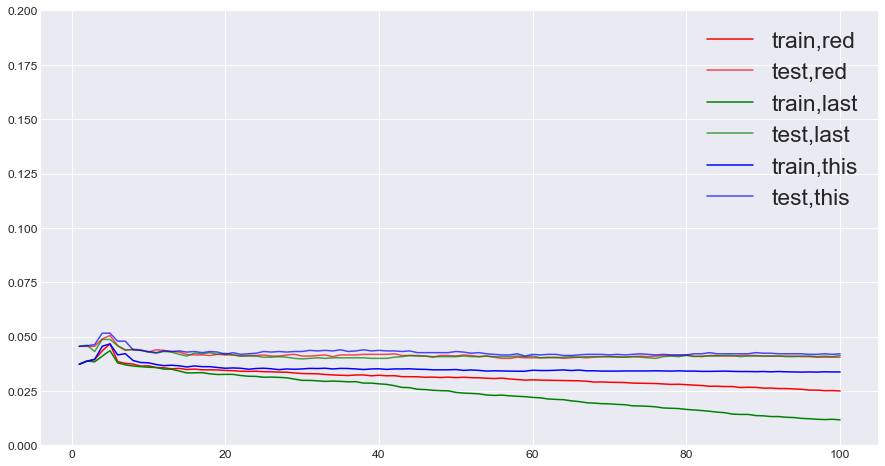

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
dtrain = xgb.DMatrix(train_x, train_y)
dtest = xgb.DMatrix(val_x,val_y)

params1 = {
        "objective":"binary:logistic",
        "max_depth":6,
        "eta":0.05,
        "gamma":0,
        "lambda":1,
        "alpha":0,
        "colsample_bytree":1,
        "colsample_bylevel":0.4,
        "colsample_bynode":1,
        "eval_metric":"error",
        }
cv_result1 = xgb.cv(params1,dtrain,num_boost_round=100,nfold=5,seed=1412)
params2 = {
        "objective":"binary:logistic",
        "max_depth":6,
        "eta":0.1,
        "gamma":0.05,
        "lambda":1,
        "alpha":0,
        "colsample_bytree":1,
        "colsample_bylevel":0.4,
        "colsample_bynode":1,
        "eval_metric":"error",
        }
cv_result2 = xgb.cv(params2,dtrain,num_boost_round=100,nfold=5,seed=1412)

params3 = {
        "objective":"binary:logistic",
        "max_depth":6,
        "eta":0.01,
        "gamma":0.05,
        "lambda":1,
        "alpha":0,
        "colsample_bytree":1,
        "colsample_bylevel":0.4,
        "colsample_bynode":1,
        "eval_metric":"error",
        }
cv_result3 = xgb.cv(params3,dtrain,num_boost_round=100,nfold=5,seed=1412)

params = [params1,params2,params3]
label = ['params1','params2','params3']
for i,label in zip(params,label):
    import xgboost as xgb
    from sklearn.metrics import f1_score
    xgb = xgb.train(i,dtrain,num_boost_round=200)
    Y_predict = pd.DataFrame(xgb.predict(dtest))
    #因为竞赛需要提交最后的预测判断，而模型给出的预测结果是概率，因此我们认为概率>0.5的即该患者有糖尿病，概率<=0.5的没有糖尿病
    Y_predict=Y_predict.loc[:,0].apply(lambda x:1 if x>0.5 else 0)
    print(f'{label}的分数是: {round(f1_score(val_y,Y_predict),5)}')

plt.style.use('seaborn-dark')
fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=0.2)
ax.grid()
ax.plot(range(1,101),cv_result1.iloc[:,0],c="red",label="train,red")
ax.plot(range(1,101),cv_result1.iloc[:,2],c="red",label="test,red",alpha=0.7)
ax.plot(range(1,101),cv_result2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,101),cv_result2.iloc[:,2],c="green",label="test,last",alpha=0.7)
ax.plot(range(1,101),cv_result3.iloc[:,0],c="blue",label="train,this")
ax.plot(range(1,101),cv_result3.iloc[:,2],c="blue",label="test,this",alpha=0.7)
ax.legend(fontsize="xx-large")
plt.show()

LGB调优-原生

[LightGBM] [Info] Number of positive: 1453, number of negative: 2349
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 3802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382167 -> initscore=-0.480359
[LightGBM] [Info] Start training from score -0.480359
[LightGBM] [Info] Number of positive: 1453, number of negative: 2349
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 3802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382167 -> initscore=-0.480359
[LightGBM] [Info] Start training from score -0.480359
[LightGBM] [

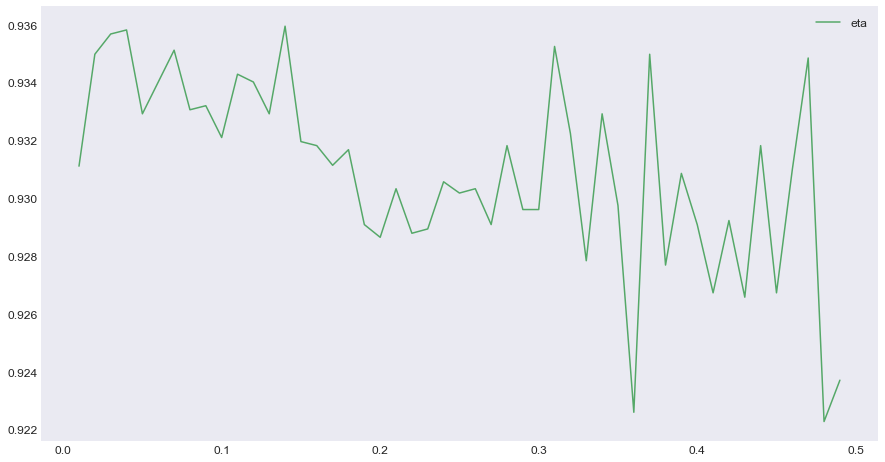

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
dtrain = lgb.Dataset(train_x, train_y)
dtest = lgb.Dataset(val_x,val_y)

eta = np.arange(0.01,0.5,0.01)
score = []
for i in eta:
    import lightgbm as lgb
    params4 = {
            'objective':'binary',
            'eta':i,
            'max_depth':13,
            'num_leaves':7,
            'lambda_l2':0.8,
            'min_data_in_leaf':2,
            'subsample':0.8,
            'bagging_freq':1,
            'feature_fraction':0.8,
        #    'slient':True,
            'seed': 1000,
            }

    num_boost_round=100
    lgb = lgb.train(params4,dtrain,num_boost_round)
    lgb.predict(val_x)
    Y_predict = pd.DataFrame(lgb.predict(val_x))
    #因为竞赛需要提交最后的预测判断，而模型给出的预测结果是概率，因此我们认为概率>0.5的即该患者有糖尿病，概率<=0.5的没有糖尿病
    Y_predict = Y_predict.loc[:,0].apply(lambda x:1 if x>0.5 else 0)
    from sklearn.metrics import f1_score
    score.append(round(f1_score(val_y,Y_predict),5))
    #print(f'f1_score: {round(f1_score(val_y,Y_predict),5)}')

plt.style.use('seaborn-dark')
fig,ax = plt.subplots(1,figsize=(15,8))
#ax.set_ylim(top=1,bottom=0.8)
plt.plot(eta,score,color='g',label='eta')
plt.legend()
plt.show()

[LightGBM] [Info] Number of positive: 1453, number of negative: 2349
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 3802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382167 -> initscore=-0.480359
[LightGBM] [Info] Start training from score -0.480359
[LightGBM] [Info] Number of positive: 1453, number of negative: 2349
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 3802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382167 -> initscore=-0.480359
[L

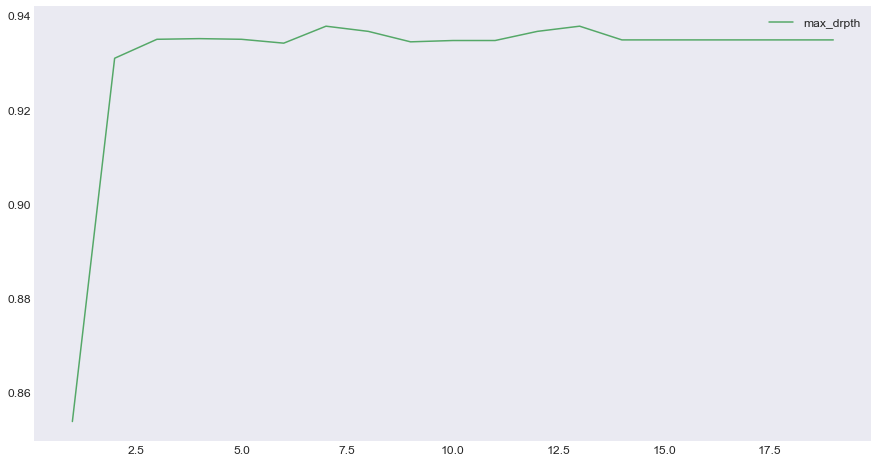

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
dtrain = lgb.Dataset(train_x, train_y)
dtest = lgb.Dataset(val_x,val_y)

max_depth = range(1,20,1)
score = []
for i in max_depth:
    import lightgbm as lgb
    params4 = {
            'objective':'binary',
            'eta':0.05,
            'max_depth':i,
            'num_leaves':31,
            'lambda_l2':0.8,
            'min_data_in_leaf':2,
            'subsample':0.8,
            'bagging_freq':1,
            'feature_fraction':0.8,
        #    'slient':True,
            'seed': 1000
            }

    num_boost_round=100
    lgb = lgb.train(params4,dtrain,num_boost_round)
    lgb.predict(val_x)
    Y_predict = pd.DataFrame(lgb.predict(val_x))
    #因为竞赛需要提交最后的预测判断，而模型给出的预测结果是概率，因此我们认为概率>0.5的即该患者有糖尿病，概率<=0.5的没有糖尿病
    Y_predict = Y_predict.loc[:,0].apply(lambda x:1 if x>0.5 else 0)
    from sklearn.metrics import f1_score
    score.append(round(f1_score(val_y,Y_predict),5))
    #print(f'f1_score: {round(f1_score(val_y,Y_predict),5)}')

plt.style.use('seaborn-dark')
fig,ax = plt.subplots(1,figsize=(15,8))
#ax.set_ylim(top=1,bottom=0.8)
plt.plot(max_depth,score,color='g',label='max_drpth')
plt.legend()
plt.show()

lightGBM

In [ ]:
import lightgbm
def select_by_lgb(train_data,train_label,test_data,random_state=2022,metric='auc',num_round=300):
    clf=lightgbm
    train_matrix=clf.Dataset(train_data,label=train_label)

    params={
            'boosting_type': 'gbdt',  
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': metric,
            'random_state': 2020,
            'n_jobs':-1 }
    model=clf.train(params,train_matrix,num_round)
    pre_y=model.predict(test_data)
    return pre_y


#输出预测值   
test_data=select_by_lgb(train,train_label,test)
pre_y=pd.DataFrame(test_data)
pre_y['label']=pre_y[0].apply(lambda x:1 if x>0.5 else 0)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y['label']
result.to_csv('lgb.csv',index=False)

[LightGBM] [Info] Number of positive: 1936, number of negative: 3134
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381854 -> initscore=-0.481686
[LightGBM] [Info] Start training from score -0.481686


In [ ]:
import lightgbm
from sklearn.model_selection import KFold
def select_by_lgb(train_data,train_label,test_data,random_state=2022,n_splits=5,metric='auc',num_round=10000,early_stopping_rounds=100):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold=0
    result=[]
    for train_idx, val_idx in kfold.split(train_data):
        random_state+=1
        train_x = train_data.loc[train_idx]
        train_y = train_label.loc[train_idx]
        test_x = train_data.loc[val_idx]
        test_y = train_label.loc[val_idx]
        clf=lightgbm
        train_matrix=clf.Dataset(train_x,label=train_y)
        test_matrix=clf.Dataset(test_x,label=test_y)
        params={
                'boosting_type': 'gbdt',  
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': metric,
                'seed': 2020,
                'nthread':-1 }
        model=clf.train(params,train_matrix,num_round,valid_sets=test_matrix,early_stopping_rounds=early_stopping_rounds)
        pre_y=model.predict(test_data)
        result.append(pre_y)
        fold+=1
    return result

test_data=select_by_lgb(train,train_label,test)
pre_y=pd.DataFrame(test_data).T
pre_y['averge']=pre_y[[i for i in range(5)]].mean(axis=1)
pre_y['label']=pre_y['averge'].apply(lambda x:1 if x>0.5 else 0)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y['label']
result.to_csv('lgb1.csv',index=False)

[LightGBM] [Info] Number of positive: 1547, number of negative: 2509
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 4056, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381410 -> initscore=-0.483567
[LightGBM] [Info] Start training from score -0.483567
[1]	valid_0's auc: 0.986998
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.988035
[3]	valid_0's auc: 0.988193
[4]	valid_0's auc: 0.98816
[5]	valid_0's auc: 0.988156
[6]	valid_0's auc: 0.988175
[7]	valid_0's auc: 0.98823
[8]	valid_0's auc: 0.988364
[9]	valid_0's auc: 0.988446
[10]	valid_0's auc: 0.988623
[11]	valid_0's auc: 0.990842
[12]	valid_0's auc: 0.990926
[13]	valid_0's auc: 0.990873
[14]	valid_0's

LGBM-SK

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
clf = LGBMClassifier(
    boosting_type='gbdt',  # 提升树的类型 gbdt,dart,goss,rf
    num_leaves=31,  #树的最大叶子数，对比xgboost一般为2^(max_depth)
    max_depth=5,  #最大树的深度
    learning_rate=0.05,  #学习率
    n_estimators=200,  # 拟合的树的棵树，相当于训练轮数
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,  # 最小分割增益
    min_child_weight=0.001,  # 分支结点的最小权重
    min_child_samples=20,
    subsample=1.0,  # 训练样本采样率 行
    subsample_freq=0,  # 子样本频率
    colsample_bytree=1.0,  # 训练特征采样率 列
    colsample_bylevel=1.0,  # 训练特征采样率 列
    colsample_bynode=1.0,  # 训练特征采样率 列
    reg_alpha=0.0,  # L1正则化系数
    reg_lambda=1,  # L2正则化系数
    random_state=None,
    n_jobs=-1,
    silent=True,
)
clf.fit(train_x,train_y, eval_metric='auc')
#设置验证集合 verbose=False不打印过程
clf.fit(train_x,train_y)


clf_hist_score = cross_val_score(clf,train,train_label,cv=10,scoring='f1').mean()
clf_hist_score


[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: colsample_bylevel


0.9425808664290797

[LightGBM] [Info] Number of positive: 1453, number of negative: 2349
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 3802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382167 -> initscore=-0.480359
[LightGBM] [Info] Start training from score -0.480359
[LightGBM] [Info] Number of positive: 1453, number of negative: 2349
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 3802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382167 -> initscore=-0.480359
[L

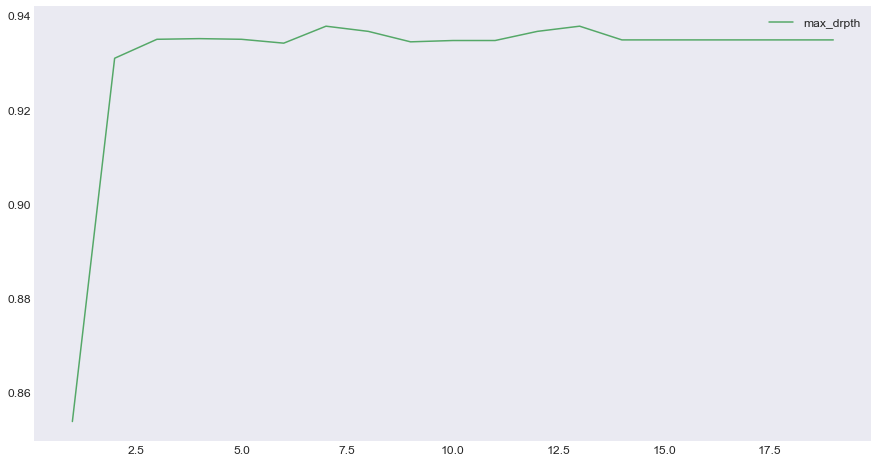

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
dtrain = lgb.Dataset(train_x, train_y)
dtest = lgb.Dataset(val_x,val_y)

max_depth = range(1,20,1)
score = []
for i in max_depth:
    import lightgbm as lgb
    params4 = {
            'objective':'binary',
            'eta':0.05,
            'max_depth':i,
            'num_leaves':31,
            'lambda_l2':0.8,
            'min_data_in_leaf':2,
            'subsample':0.8,
            'bagging_freq':1,
            'feature_fraction':0.8,
        #    'slient':True,
            'seed': 1000
            }

    num_boost_round=100
    lgb = lgb.train(params4,dtrain,num_boost_round)
    lgb.predict(val_x)
    Y_predict = pd.DataFrame(lgb.predict(val_x))
    #因为竞赛需要提交最后的预测判断，而模型给出的预测结果是概率，因此我们认为概率>0.5的即该患者有糖尿病，概率<=0.5的没有糖尿病
    Y_predict = Y_predict.loc[:,0].apply(lambda x:1 if x>0.5 else 0)
    from sklearn.metrics import f1_score
    score.append(round(f1_score(val_y,Y_predict),5))
    #print(f'f1_score: {round(f1_score(val_y,Y_predict),5)}')

plt.style.use('seaborn-dark')
fig,ax = plt.subplots(1,figsize=(15,8))
#ax.set_ylim(top=1,bottom=0.8)
plt.plot(max_depth,score,color='g',label='max_drpth')
plt.legend()
plt.show()

# 随机森林优化

## 基于网格的随机森林优化

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score
rfc=RandomForestClassifier(random_state=0
                           #,n_estimators=151
                           #,max_depth=11
                           #,min_samples_leaf=5
                           #,max_features=9
                           )
params={
        'n_estimators':[*range(150,155,1)]
        ,'max_depth':[*range(10,12,1)]
        ,'min_samples_leaf':[4,5,6]
        ,'max_features':[*range(1,20,1)]
        #'max_samples':[*range(0.1,1,0.1)]
        }

rfc_cv=GridSearchCV(rfc,param_grid=params,refit=True,cv=5,n_jobs=-1,scoring="f1").fit(train,train_label)

print('best parameters:',rfc_cv.best_params_)
print('best score:',rfc_cv.best_score_)       
print('train score:',rfc_cv.score(train_x,train_y))         
print('test score:',rfc_cv.score(val_x,val_y))              

best parameters: {'max_depth': 11, 'max_features': 9, 'min_samples_leaf': 6, 'n_estimators': 150}
best score: 0.9478654267303419
train score: 0.9664243682935271
test score: 0.9591623036649215


## 基于随机网格的随机森林优化

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score

#创造参数空间 - 使用与网格搜索时完全一致的空间，以便于对比
param_grid_simple = {#"criterion": ["squared_error","poisson"]
                    'n_estimators': [*range(140,160,2)],
                    'max_depth': [*range(10,15,1)],
                    'min_samples_leaf':[4,5,6],
                    "max_features": ["log2","sqrt",5,10,15,"auto"]
                     #, "min_impurity_decrease": [*range(0,5,10)]
                    }

#建立回归器、交叉验证
rfc = RandomForestClassifier(random_state=1412,verbose=True,n_jobs=-1)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
rfc_rcv = RandomizedSearchCV(estimator=rfc
                            ,param_distributions=params
                            ,n_iter = 400 #子空间的大小是全域空间的一半左右
                            ,scoring = "f1"
                            ,verbose = True
                            ,cv = cv
                            ,random_state=1412
                            ,n_jobs=-1
                           ).fit(train,train_label)

print('best parameters:',rfc_rcv.best_estimator_)
print('best score:',rfc_rcv.best_score_)       
print('train score:',rfc_rcv.score(train_x,train_y))         
print('test score:',rfc_rcv.score(val_x,val_y))              

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


best parameters: RandomForestClassifier(max_depth=11, max_features=9, min_samples_leaf=5,
                       n_estimators=153, n_jobs=-1, random_state=1412,
                       verbose=True)
best score: 0.9474703631459815
train score: 0.9688365650969529
test score: 0.9644351464435146


[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 153 out of 153 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 153 out of 153 | elapsed:    0.0s finished


## 基于hyperOPE贝叶斯优化随机森林

In [ ]:
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss

def hyperopt_objective(params):
    
    #定义评估器
    #需要搜索的参数需要从输入的字典中索引出来
    #不需要搜索的参数，可以是设置好的某个值
    #在需要整数的参数前调整参数类型
    reg = RandomForestClassifier(n_estimators = int(params["n_estimators"])
                                ,max_depth = int(params["max_depth"])
                                ,max_features = int(params["max_features"])
                                # ,min_impurity_decrease = params["min_impurity_decrease"]
                                ,random_state=1412
                                ,verbose=False
                                ,n_jobs=-1)
    
    #交叉验证结果，输出负根均方误差（-RMSE）
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(reg,train_x,train_y
                                     ,scoring="f1"
                                     ,cv=cv
                                     ,verbose=False
                                     ,n_jobs=-1
                                     ,error_score='raise'
                                    )
    
    #最终输出结果，由于只能取最小值，所以必须对（-RMSE）求绝对值
    #以求解最小RMSE所对应的参数组合
    return validation_loss["test_score"].mean()

# 样本空间
param_grid_simple = {'n_estimators': hp.quniform("n_estimators",120,180,10)
                    , 'max_depth': hp.quniform("max_depth",5,15,2)
                    , "max_features": hp.quniform("max_features",2,20,2)
                    # , "min_impurity_decrease":hp.quniform("min_impurity_decrease",0,5,1)
                    }

def param_hyperopt(max_evals=100):
    
    #保存迭代过程
    trials = Trials()
    
    #设置提前停止
    early_stop_fn = no_progress_loss(100)
    
    #定义代理模型
    #algo = partial(tpe.suggest, n_startup_jobs=20, n_EI_candidates=50)
    params_best = fmin(hyperopt_objective #目标函数
                       , space = param_grid_simple #参数空间
                       , algo = tpe.suggest #代理模型你要哪个呢？
                       #, algo = algo
                       , max_evals = max_evals #允许的迭代次数
                       , verbose=True
                       , trials = trials
                       , early_stop_fn = early_stop_fn
                      )
    
    #打印最优参数，fmin会自动打印最佳分数
    print("\n","\n","best params: ", params_best,
          "\n")
    return params_best, trials

params_best, trials = param_hyperopt(30) #1%的空间大小

100%|██████████| 30/30 [00:30<00:00,  1.01s/trial, best loss: 0.941756241192231] 

 
 best params:  {'max_depth': 12.0, 'max_features': 14.0, 'n_estimators': 120.0} 



## 基于optuna贝叶斯优化随机森林

In [ ]:
import optuna
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

#目标函数
def optuna_objective(trial):
    
    #定义参数空间
    min_samples_leaf= trial.suggest_int("min_samples_leaf",2,4,1)
    min_samples_split= trial.suggest_int("min_samples_split",2,5,1)
    n_estimators = trial.suggest_int("n_estimators",150,250,1) #整数型，(参数名称，下界，上界，步长)
    max_depth = trial.suggest_int("max_depth",8,16,1)
    max_features = trial.suggest_int("max_features",10,20,1)
    #max_samples = trial.suggest_float("max_samples",0,1)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
    #min_impurity_decrease = trial.suggest_int("min_impurity_decrease",0,5,1)
    #min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) #浮点型
    
    #定义评估器
    #需要优化的参数由上述参数空间决定
    #不需要优化的参数则直接填写具体值
    rfc = RandomForestClassifier(n_estimators = n_estimators
                                ,max_depth = max_depth
                                ,max_features = max_features
                                #,min_impurity_decrease = min_impurity_decrease
                                ,min_samples_leaf=min_samples_leaf
                                ,min_samples_split=min_samples_split
                                #,max_samples=max_samples
                                ,class_weight="balanced"
                                ,random_state=1412
                                ,verbose=False
                                ,n_jobs=-1
                              )
    
    #交叉验证过程，输出负均方根误差(-RMSE)
    #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
    #如果选择输出RMSE，则选择最小化
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(rfc,train,train_label
                                     ,scoring="f1"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                    )
    #最终输出RMSE
    return np.mean(abs(validation_loss["test_score"]))

#优化函数
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="minimize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
optimizer_optuna(100,"TPE")

100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


 
 best params:  {'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 189, 'max_depth': 14, 'max_features': 16} 
 
 best score:  [0.9401562205453097] 



({'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 189,
  'max_depth': 14,
  'max_features': 16},
 [0.9401562205453097])

In [ ]:
model=RandomForestClassifier(max_depth=11
                            ,min_samples_leaf=1
                            ,min_samples_split=3
                            ,n_estimators=160
                          #  ,min_impurity_decrease = 0
                            ,max_features=9
                            ,random_state=2022
                            )
model = model.fit(train,train_label)
score = cross_val_score(model,train,train_label,cv=5,scoring='f1').mean()
score


0.9456317772274202

# 优化GBDT

## 基于optuna贝叶斯优化GBDT

In [ ]:
import optuna
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def optuna_objective(trial):
    
    #定义参数空间
    learning_rate = trial.suggest_discrete_uniform("learning_rate",0.01,0.1,0.01)
    min_samples_split= trial.suggest_int("min_samples_leaf",1,5,1)
    n_estimators = trial.suggest_int("n_estimators",140,160,1) #整数型，(参数名称，下界，上界，步长)
    max_depth = trial.suggest_int("max_depth",12,20,1)
    max_features = trial.suggest_int("max_features",16,20,1)
    subsample = trial.suggest_discrete_uniform("subsample",0.5,1,0.1)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
    #min_impurity_decrease = trial.suggest_int("min_impurity_decrease",0,5,1)
    #min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) #浮点型
    
    #定义评估器
    #需要优化的参数由上述参数空间决定
    #不需要优化的参数则直接填写具体值
    GBDT = GradientBoostingClassifier(n_estimators = n_estimators
                                      ,max_depth = max_depth
                                      ,learning_rate=learning_rate
                                      ,max_features = max_features
                                      ,subsample =subsample 
                                      ,min_samples_leaf=min_samples_split
                                    # ,min_impurity_decrease = min_impurity_decrease
                                    # ,max_samples=0.8
                                      ,random_state=1412
                                      ,verbose=False
                                    # ,n_jobs=-1
                                    )
    
    #交叉验证过程，输出负均方根误差(-RMSE)
    #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
    #如果选择输出RMSE，则选择最小化
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(GBDT,train,train_label
                                     ,scoring="f1"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                    )
    #最终输出RMSE
    return np.mean(abs(validation_loss["test_score"]))

#优化函数
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="minimize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
optimizer_optuna(10,"TPE")

100%|██████████| 10/10 [00:36<00:00,  3.63s/it]


 
 best params:  {'learning_rate': 0.02, 'min_samples_leaf': 4, 'n_estimators': 140, 'max_depth': 17, 'max_features': 20, 'subsample': 1.0} 
 
 best score:  [0.9383046452737499] 



({'learning_rate': 0.02,
  'min_samples_leaf': 4,
  'n_estimators': 140,
  'max_depth': 17,
  'max_features': 20,
  'subsample': 1.0},
 [0.9383046452737499])

# 优化HGB

## 基于optuna贝叶斯优化HGB

In [ ]:
import optuna
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def optuna_objective(trial):
    
    #定义参数空间
    #loss = trial.suggest_categorical("loss",["log_loss", "binary_crossentropy", "categorical_crossentropy", "auto"])
    max_iter = trial.suggest_int("max_iter",300,500,50)
    learning_rate = trial.suggest_discrete_uniform("learning_rate",0.1,0.5,0.05)
    #min_samples_leaf= trial.suggest_int("min_samples_leaf",1,5,1)
    #l2_regularization = trial.suggest_int("l2_regularization",0,10,1)
    #max_depth = trial.suggest_int("max_depth",1,20,1)
    #max_features = trial.suggest_int("max_features",10,20,1)
    #subsample = trial.suggest_int("subsample",0.1,1,0.1)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
    #min_impurity_decrease = trial.suggest_int("min_impurity_decrease",0,5,1)
    #min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) #浮点型
    
    #定义评估器
    #需要优化的参数由上述参数空间决定
    #不需要优化的参数则直接填写具体值
    hgb = HistGradientBoostingClassifier(max_iter = max_iter
                                      #  ,max_depth = max_depth
                                      #,loss = loss
                                      #  ,min_samples_leaf = min_samples_leaf
                                      #  ,l2_regularization=l2_regularization
                                        ,learning_rate= learning_rate
                                      #,max_features = max_features
                                      # ,min_impurity_decrease = min_impurity_decrease
                                      # ,max_samples=0.8
                                        ,random_state=1412
                                        ,verbose=False
                                      # ,n_jobs=-1
                                      )
    
    #交叉验证过程，输出负均方根误差(-RMSE)
    #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
    #如果选择输出RMSE，则选择最小化
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(hgb,train,train_label
                                     ,scoring="f1"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                    )
    #最终输出RMSE
    return np.mean(abs(validation_loss["test_score"]))
    
#优化函数
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="minimize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
optimizer_optuna(200,"TPE")

100%|██████████| 200/200 [05:30<00:00,  1.65s/it]


 
 best params:  {'max_iter': 500, 'learning_rate': 0.1} 
 
 best score:  [0.9372678787743116] 



({'max_iter': 500, 'learning_rate': 0.1}, [0.9372678787743116])

# 优化XGB

## 基于随机网格搜索优化XGB

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score

#创造参数空间 - 使用与网格搜索时完全一致的空间，以便于对比
params = {
        'n_estimators': [*range(100,200,10)]
        , 'max_depth': [*range(5,20,5)]
        , "max_features": ["log2","sqrt",5,10,15,"auto"]
        ,"gamma":[1,3,5,7,9]
        ,"learning_rate":[0.01,0.05,0.1]
        #,"booster":"dart"
        #,"max_depth = max_depth
        #,"max_features = max_features
        #,"colsample_bytree=colsample_bytree
        #,"colsample_bynode=colsample_bynode
        #,"min_child_weight=min_child_weight
        #,"reg_lambda=reg_lambda
        }

#建立回归器、交叉验证
rfc = XGBClassifier(booster="dart",random_state=1412,verbose=True,n_jobs=-1)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
xgb_rcv = RandomizedSearchCV(estimator=rfc
                            ,param_distributions=params
                            ,n_iter = 200 #子空间的大小是全域空间的一半左右
                            ,scoring = "f1"
                            ,verbose = True
                            ,cv = cv
                            ,random_state=1412
                            ,n_jobs=-1
                           ).fit(train,train_label)

print('best parameters:',xgb_rcv.best_estimator_)
print('best score:',xgb_rcv.best_score_)       
print('train score:',xgb_rcv.score(train_x,train_y))         
print('test score:',xgb_rcv.score(val_x,val_y))     

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[23:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


best parameters: XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_features='sqrt', max_le

## 基于hyperOPT贝叶斯优化XGB

In [ ]:
#导入优化算法
import hyperopt
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss

#data_xgb = xgb.DMatrix(train_x,train_y)
def hyperopt_objective(params):
    paramsforxgb = {"eta":params["eta"]
                    ,"booster":params["booster"]
                    ,"colsample_bytree":params["colsample_bytree"]
                    ,"colsample_bynode":params["colsample_bynode"]
                    #,"gamma":params["gamma"]
                    ,"lambda":params["lambda"]
                    ,"min_child_weight":params["min_child_weight"]
                    ,"max_depth":int(params["max_depth"])
                    ,"subsample":params["subsample"]
                    ,"objective":params["objective"]
                    ,"rate_drop":params["rate_drop"]
                    ,"nthread":14
                    ,"verbosity":0
                    ,"seed":1412}

    xgb = XGBClassifier(
                        eta = int(params["eta"]),
                        booster=int(params["booster"]),
                        colsample_bytree=int(params["colsample_bytree"]),
                        colsample_bynode=int(params["colsample_bynode"]),
                        #gamma":params["gamma"],
                        #lambda=int(params["lambda"]),
                        #min_child_weight=int(params["min_child_weight"]),
                        #max_depth=int(params["max_depth"]),
                        #subsample=int(params["subsample"]),
                        #objective=int(params["objective"]),
                        #rate_drop=int(params["rate_drop"])
                        )
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(xgb,train,train_label
                                     ,scoring="f1"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                     )
    #最终输出RMSE
    return np.mean(abs(validation_loss["test_score"]))

param_grid_simple = {'num_boost_round': hp.quniform("num_boost_round",50,200,10)
                     ,"eta": hp.quniform("eta",0.05,2.05,0.05)
                     ,"booster":hp.choice("booster",["gbtree","dart"])
                     ,"colsample_bytree":hp.quniform("colsample_bytree",0.3,1,0.1)
                     ,"colsample_bynode":hp.quniform("colsample_bynode",0.1,1,0.1)
                    # ,"gamma":hp.quniform("gamma",1e6,1e7,1e6)
                     ,"lambda":hp.quniform("lambda",0,3,0.2)
                     ,"min_child_weight":hp.quniform("min_child_weight",0,50,2)
                     ,"max_depth":hp.choice("max_depth",[*range(2,30,2)])
                     ,"subsample":hp.quniform("subsample",0.1,1,0.1)
                     ,"objective":hp.choice("objective",["binary:logistic","binary:hinge"])
                     ,"rate_drop":hp.quniform("rate_drop",0.1,1,0.1)
                    }

def param_hyperopt(max_evals=100):
    
    #保存迭代过程
    trials = Trials()
    
    #设置提前停止
    early_stop_fn = no_progress_loss(30)
    
    #定义代理模型
    params_best = fmin(hyperopt_objective
                       , space = param_grid_simple
                       , algo = tpe.suggest
                       , max_evals = max_evals
                       , verbose=True
                       , trials = trials
                       , early_stop_fn = early_stop_fn
                      )
    
    #打印最优参数，fmin会自动打印最佳分数
    print("\n","\n","best params: ", params_best,
          "\n")
    return params_best, trials

params_best, trials = param_hyperopt(100) #由于参数空间巨大，给与100次迭代的空间

## 基于optuna贝叶斯优化XGB

In [ ]:
import optuna
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def optuna_objective(trial):
    
    #定义参数空间
    gamma= trial.suggest_int("gamma",3,5,1)
    #learning_rate = trial.suggest_float("learning_rate",0.1,0.5)
    n_estimators = trial.suggest_int("n_estimators",210,230,5) #整数型，(参数名称，下界，上界，步长)
    #booster = trial.suggest_categorical("booster",["gbtree","dart"])
    #reg_lambda = trial.suggest_float("reg_lambda",0.3,0.5)
    #colsample_bytree = trial.suggest_float("colsample_bytree",0.3,1)
    #colsample_bynode=trial.suggest_float("colsample_bynode",0.1,1)
    #min_child_weight=trial.suggest_int("min_child_weight",0,50,2)
    #max_depth = trial.suggest_int("max_depth",6,16,2)
    #max_features = trial.suggest_int("max_features",0,20,4)
    #subsample = trial.suggest_float("subsample",0.1,1)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
    #min_impurity_decrease = trial.suggest_int("min_impurity_decrease",0,5,1)
    #min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) #浮点型
    
    #定义评估器
    xgb = XGBClassifier(
                        gamma=gamma,
                        n_estimators = n_estimators,
                        #learning_rate=learning_rate,
                        booster="dart",
                        #max_depth = max_depth,
                        #max_features = max_features,
                        #colsample_bytree=colsample_bytree,
                        #colsample_bynode=colsample_bynode,
                        #min_child_weight=min_child_weight,
                        #reg_lambda=reg_lambda,
                        #subsample=subsample,
                        random_state=1412,
                        verbose=False,
                        tree_method='gpu_hist', 
                        gpu_id=0,
                        n_jobs=-1
                      )
    
    #交叉验证过程，输出验证分数
    #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
    #如果选择输出RMSE，则选择最小化
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(xgb,train,train_label
                                     ,scoring="f1"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                    )
    #最终输出RMSE
    return np.mean(abs(validation_loss["test_score"]))
    
#优化函数
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="minimize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
optimizer_optuna(100,"TPE")

#best params:  {'gamma': 3, 'n_estimators': 250} 
#best score:  [0.9448901797866125] 

  1%|          | 1/100 [02:01<3:20:27, 121.49s/it]

# 优化LGBM

## 基于optuna贝叶斯优化LGB

In [ ]:
import optuna
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def optuna_objective(trial):
    
    #定义参数空间
    #gama= trial.suggest_discrete_uniform("gama",0,10,1)
    n_estimators = trial.suggest_int("n_estimators",100,300,50) #整数型，(参数名称，下界，上界，步长)
    #learning_rate = trial.suggest_discrete_uniform("learning_rate",0.1,0.5,0.1)
    #max_depth = trial.suggest_int("max_depth",1,15,1)
    #max_features = trial.suggest_int("max_features",1,20,1)
    #num_leaves = trial.suggest_int("max_leaves",10,100,10)
    #max_bin = trial.suggest_int("max_bin",20,250,10)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
    #min_impurity_decrease = trial.suggest_int("min_impurity_decrease",0,5,1)
    #min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) #浮点型
    
    #定义评估器
    #需要优化的参数由上述参数空间决定
    #不需要优化的参数则直接填写具体值
    lgb = LGBMClassifier(n_estimators = n_estimators,
                        #learning_rate=learning_rate,
                        #max_depth = max_depth,
                        #num_leaves=num_leaves,
                        #gama=gama,
                        #max_features = max_features,
                        #max_bin=max_bin,
                        #min_impurity_decrease = min_impurity_decrease,
                        #max_samples=0.8,
                        random_state=2022,
                        verbose=0,
                        n_jobs=-1
                        )
    
    #交叉验证过程，输出负均方根误差(-RMSE)
    #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
    #如果选择输出RMSE，则选择最小化
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(lgb,train,train_label
                                     ,scoring="f1"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                    )
    #最终输出RMSE
    return np.mean(abs(validation_loss["test_score"]))
    
#优化函数
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="minimize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
best_params,best_score = optimizer_optuna(200,"TPE")


100%|██████████| 200/200 [01:16<00:00,  2.62it/s]


 
 best params:  {'n_estimators': 300} 
 
 best score:  [0.9428580997770084] 



# voting模型融合

f1平均值：0.9442
f1标准差：0.0125


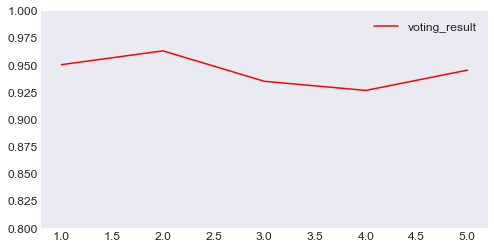

In [ ]:
from sklearn.ensemble import VotingClassifier

# 需要以元组的列表方式来构建estimators

rfc = RandomForestClassifier(max_depth=11, 
                             min_samples_leaf=5, 
                             n_estimators=151,
                             max_features=9,
                             random_state=2022
                             )
gbc = GradientBoostingClassifier(n_estimators=131
                                ,max_depth=18
                                ,max_features=19
                                ,learning_rate=0.01
                                ,random_state=2022
                                )
hgb = HistGradientBoostingClassifier(max_iter =84                  
                                    ,learning_rate=0.01
                                    ,max_depth=33
                                    ,min_samples_leaf=2
                                    ,random_state=2022
                                    ,l2_regularization=0
                                    )

lgbm = LGBMClassifier(gama=0
                      #,n_estimators=181
                      #,learning_rate=0.01
                      ,random_state=2022
                      ,n_estimators=119
                      ,booster="dart"
                      ,learning_rate=0.06
                      ,max_depth=6
                      ,max_feature=13
                      ,objective='binary'
                      ,subsample=0.8
                      ,reg_lambda=1
                      ,min_impurity_decrease = 4
                    )
xgb = XGBClassifier(gama=9
                    ,n_estimators=181
                    ,learning_rate=0.01
                    ,random_state=2022
                    ,max_depth=6
                    ,max_feature=18
                    ,objective='binary:logistic'
                    ,subsample=0.8
                    ,reg_lambda=1
                    ,min_impurity_decrease = 3
                    )

estimators = [("RFC",rfc),
              ("GBC",gbc),
              ("HGB",hgb),
              ("LGBM",lgbm),
              ("XGB",xgb)]
              
mix = VotingClassifier(estimators,verbose=True) # vervose监控过程
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
mix_result = cross_validate(mix,train_x,train_y
                                     ,scoring="f1"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                    )

#mix_result = cross_val_score(mix,train,train_label,cv=5,n_jobs=-1,scoring="f1")
print(f'f1平均值：{round(mix_result["test_score"].mean(),4)}')
print(f'f1标准差：{round(mix_result["test_score"].std(),4)}')

plt.style.use('seaborn-dark')
fig,ax = plt.subplots(1,figsize=(8,4))
ax.set_ylim(top=1,bottom=0.8)
plt.plot(range(1,6),mix_result["test_score"],color='red',label='voting_result')
plt.legend()
plt.show()

f1平均值是：0.9436


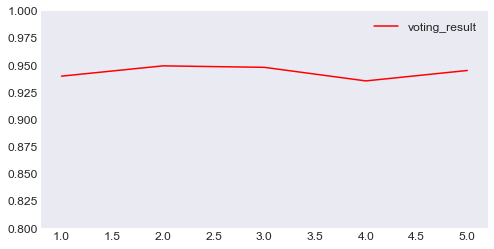

In [ ]:
from sklearn.ensemble import VotingClassifier

# 需要以元组的列表方式来构建estimators

rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
hgb = HistGradientBoostingClassifier()
lgbm = LGBMClassifier()
xgb = XGBClassifier()

estimators = [("RFC",rfc),
              ("GBC",gbc),
              ("HGB",hgb),
              ("LGBM",lgbm),
              ("XGB",xgb)]
              
mix = VotingClassifier(estimators,verbose=True) # vervose监控过程
mix_result = cross_val_score(mix,train,train_label,cv=5,n_jobs=-1,scoring="f1")
print(f'f1平均值是：{round(mix_result.mean(),4)}')

plt.style.use('seaborn-dark')
fig,ax = plt.subplots(1,figsize=(8,4))
ax.set_ylim(top=1,bottom=0.8)
plt.plot(range(1,6),mix_result,color='red',label='voting_result')
plt.legend()
plt.show()

In [ ]:
mix = mix.fit(train,train_label)
pre_y=mix.predict(test)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y
result.to_csv('voting.csv',index=False)

[Voting] ...................... (1 of 2) Processing RFC, total=   1.2s
[16:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gama", "max_feature", "min_impurity_decrease" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[Voting] ...................... (2 of 2) Processing XGB, total=   0.3s


# 结果提交

In [24]:
model=RandomForestClassifier(max_depth=11,
                             min_samples_leaf=5,
                             n_estimators=151,
                             max_features=9,
                             random_state=2022
                             )
model = model.fit(train,train_label)
score = cross_val_score(model,train,train_label,cv=5,scoring='f1').mean()
score


0.9465158302817731

In [26]:
model.fit(train_x,train_y)
model.score(train_x,train_y),model.score(val_x,val_y)

(0.975013150973172, 0.9550473186119873)

In [ ]:
pre_y=model.predict(test)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y
result.to_csv('rfc.csv',index=False)

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
def result_df(model, X_train, y_train, X_test, y_test, metrics=
              [accuracy_score, recall_score, precision_score, f1_score, roc_auc_score]):
    res_train = []
    res_test = []
    col_name = []
    for fun in metrics:
        res_train.append(fun(model.predict(X_train), y_train))
        res_test.append(fun(model.predict(X_test), y_test)) 
        col_name.append(fun.__name__)
    idx_name = ['train_eval', 'test_eval']
    res = pd.DataFrame([res_train, res_test], columns=col_name, index=idx_name)
    return res
result_df(model,train_x,train_y,val_x,val_y)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.975013,0.970222,0.964212,0.967207,0.974085
test_eval,0.955047,0.936475,0.946170,0.941298,0.951571


# AutoML

In [ ]:
#导入
from hpsklearn import HyperoptEstimator

#实例化
estim = HyperoptEstimator()

In [ ]:

#训练
estim.fit(train_x, train_y)


In [ ]:
prediction = estim.predict(val_x)
score = estim.score(val_y,val_x)
score

In [ ]:

#直接返回sklearn中存在的，选择出的最好模型
model = estim.best_model()